In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

df = pd.read_csv(url, skiprows=23)

print(df.head())

                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


C:\Users\fmtie\AppData\Local\Temp\ipykernel_14080\3205493729.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


In [37]:
# I want to extract the time data from the date column and place it in a new column called 'Time'
# I use the pd.to_datetime function to convert the date column to a datetime object
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df['time'] = pd.to_datetime(df['date']).dt.time

# then create a date only column (as I later realised I might need to keep the column containing both date and time data in addition to creating separate date and time columns)
df['date only'] = pd.to_datetime(df['date']).dt.date

# rename date column to 'date and time'
df.rename(columns={'date': 'date and time'}, inplace=True)

df.set_index('date only', inplace=True)

#print(df.head())

C:\Users\fmtie\AppData\Local\Temp\ipykernel_14080\3055234997.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['date']).dt.time
C:\Users\fmtie\AppData\Local\Temp\ipykernel_14080\3055234997.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date only'] = pd.to_datetime(df['date']).dt.date


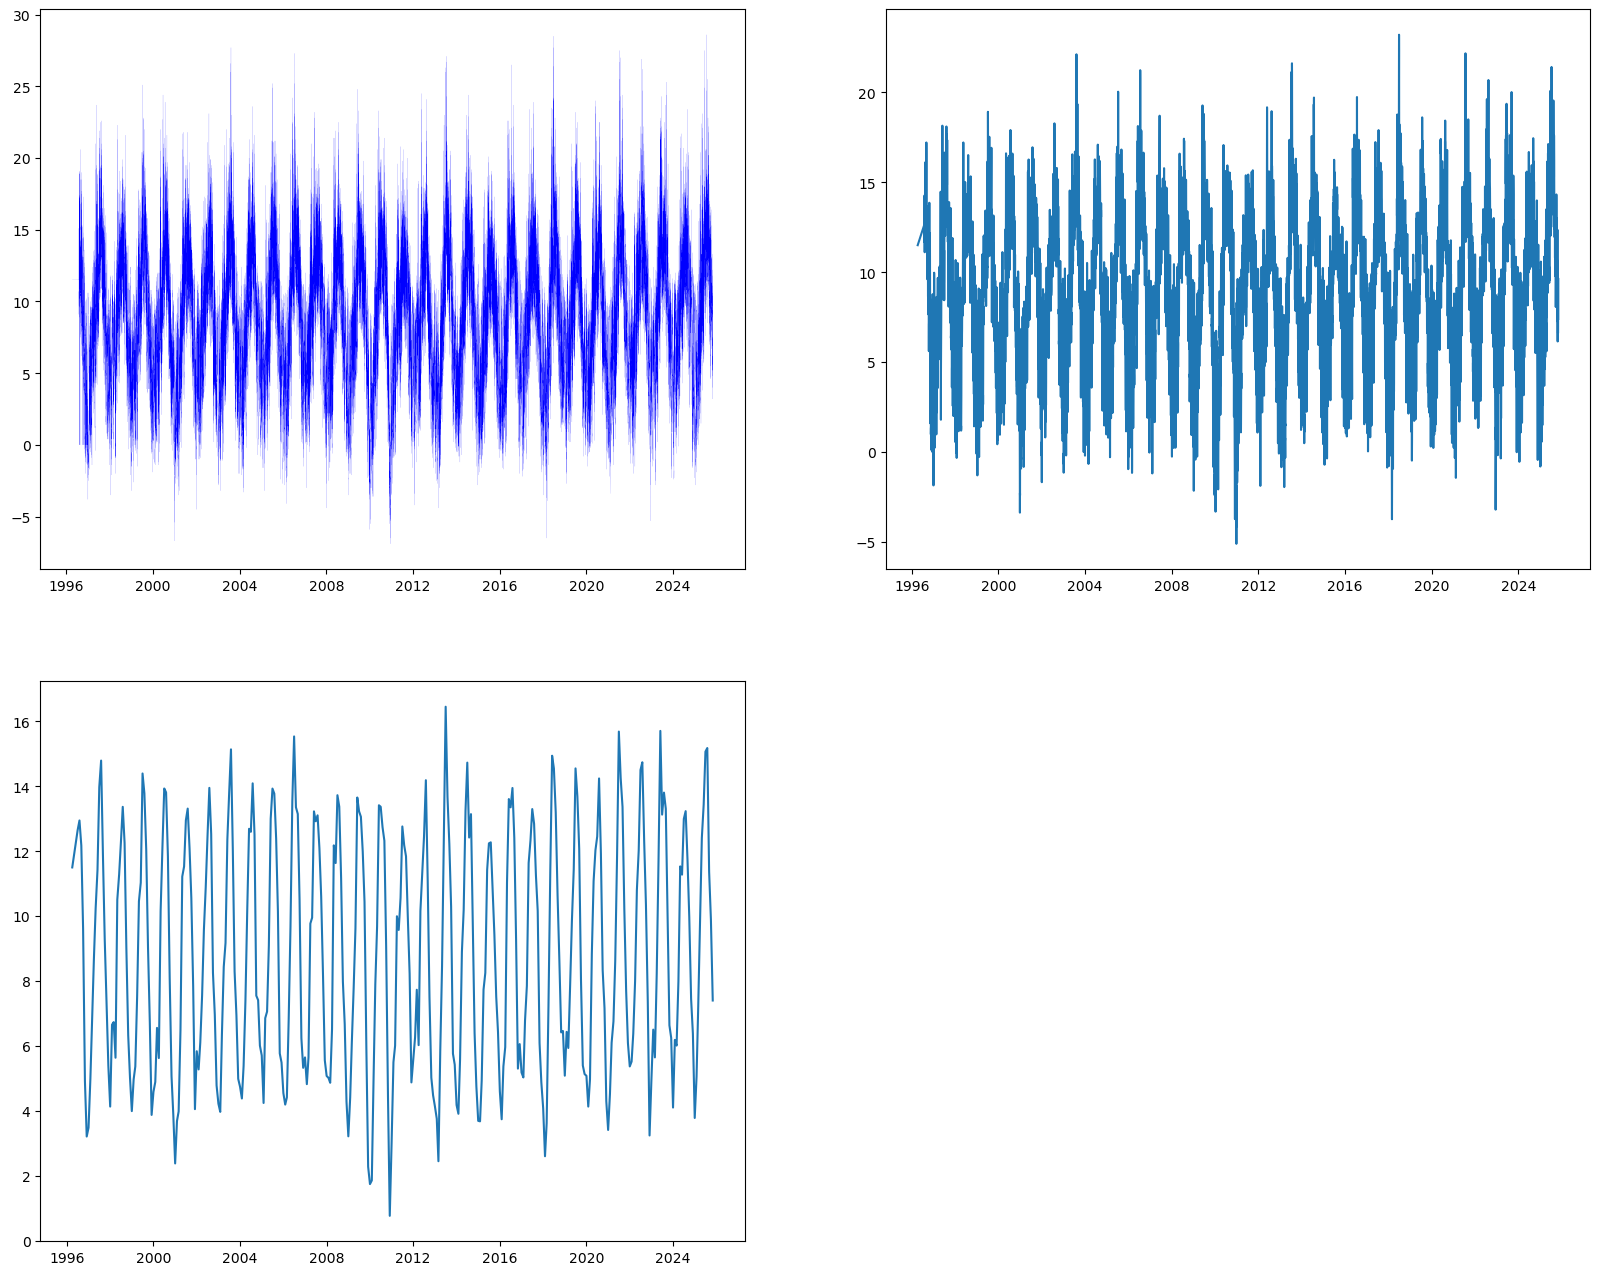

In [38]:
# referencing Wes McKinney's "Python for Data Analysis" 2nd edition, pages 281 - 317,
# I create a figure containing three subplots
# one to plot the temperature data each day, the mean temperature each day, and then the mean temperature each month

fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

temp = df['temp']
date_time = df['date and time']
time = df['time']

# creating the first plot - temperature data each day
ax1.plot(temp, linestyle='-', color='blue', linewidth=0.05)

# creating the second plot - mean temperature each day
daily_mean = df.groupby(df.index)['temp'].mean()
ax2.plot(daily_mean)

# creating the third plot - mean temperature each month
date_only_dt = pd.to_datetime(df.index)
monthly_mean = df.groupby(date_only_dt.to_period('M'))['temp'].mean()
ax3.plot(monthly_mean.index.to_timestamp(), monthly_mean.values)

C:\Users\fmtie\AppData\Local\Temp\ipykernel_14080\3823692096.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wdsp'].fillna(wdsp_mean, inplace=True)  # fill blanks with mean


<Axes: xlabel='date only', ylabel='wdsp'>

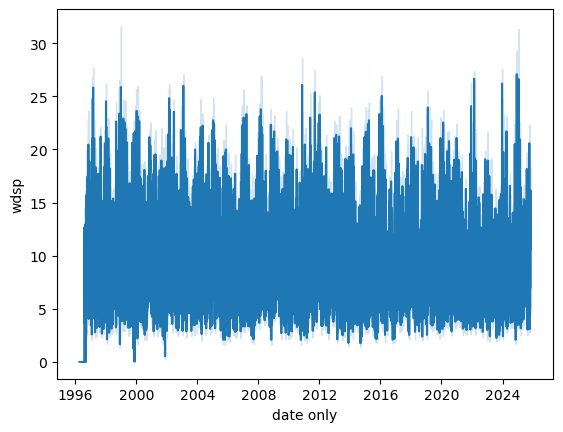

In [39]:
# creating a plot for wind speed each day
# first replacing any missing values with the mean wind speed
# converting all values in wdsp column to integers
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')  # blanks → NaN
wdsp_mean = df['wdsp'].mean()  # mean ignores NaN
df['wdsp'].fillna(wdsp_mean, inplace=True)  # fill blanks with mean

sns.lineplot(data=df, x=df.index, y='wdsp')

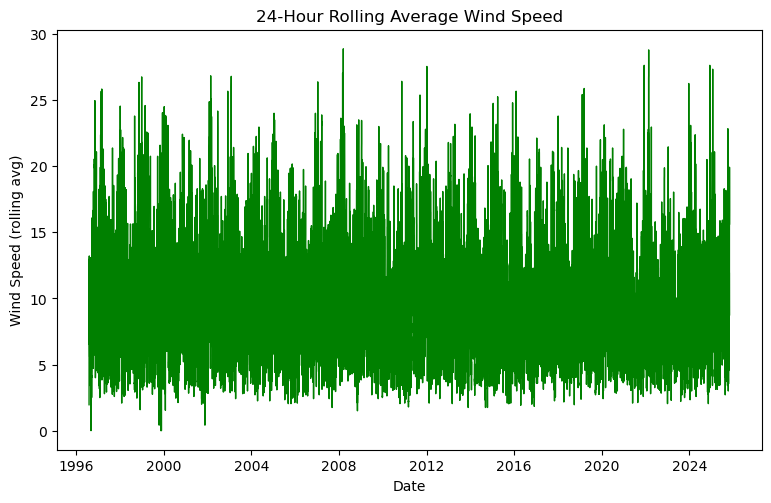

TypeError: Invalid object type at position 0

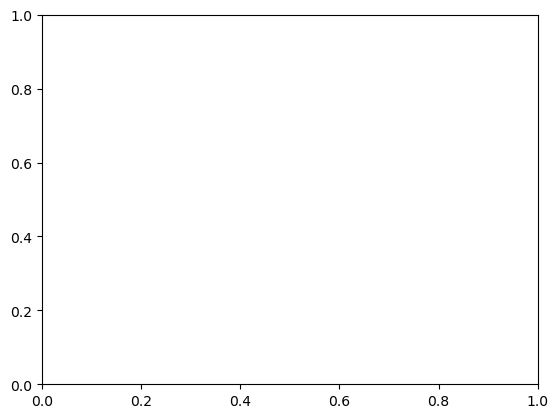

In [ ]:
# calculating and plotting a 24-hour rolling average of wind speed
# a rolling window of 24 represents 24 hourly observations
rolling_wdsp = df['wdsp'].rolling(window=24).mean()

fig = plt.figure(figsize=(20, 12))

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(rolling_wdsp, linestyle='-', color='green', linewidth=1)
ax4.set_title('24-Hour Rolling Average Wind Speed')
ax4.set_xlabel('Date')
ax4.set_ylabel('Wind Speed (rolling avg)')
plt.show()